# Predicting Car Prices
In this project we will be using machine learning using a k-nearest neighbors algorithm in order to predict a car's price based on its different parameters. The data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and contains the make, model, body type, and many more different data points for each car.  More can be read about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import pandas as pd
import numpy as np
#allows view of all columns
pd.set_option('display.max_columns', None)

cars = pd.read_csv('imports-85.data')
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


There is no header row, so the column names are not matching what they should be after reading in the data set. 

In [2]:
#list containing column names
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors',
               'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
                'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system',
               'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
               'price']
cars = pd.read_csv('imports-85.data', names = column_names)
cars.head(3)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
#list of all continuous numerical_cols
continuous_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
                  'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
                   'city_mpg', 'highway_mpg', 'price']  

In [4]:
cars.replace(to_replace = '?', value = np.nan, inplace = True)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


# Data Cleaning

Since the missing values were marked with ?, numerical columns were cast as objects instead of numerical types.

In [5]:
print(continuous_cols)
print(cars.dtypes)

['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object


In [6]:
#columns to convert to numerical dtype
to_convert = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
#changes desired columns to float
cars[to_convert] = cars[to_convert].astype('float')
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [7]:
cars_numerical = cars[continuous_cols]
cars_numerical.isna().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We are predicting price so all rows with missing price must be removed, elsewhere fill in the missing values with column mean

In [8]:
#drops all rows with a missing price value
cars_numerical = cars_numerical[cars_numerical['price'].notnull()]

In [9]:
#fills missing values with mean
cars_numerical = cars_numerical.fillna(cars_numerical.mean())
cars_numerical.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Next we need to normalize the column values

In [10]:
#function that takes in a dataframe and normalizes values between 0 and 1
def normalize(df):
    df_copy = df.copy()
    
    columns = list(df.columns)
    columns.remove('price')
    #normalizes dataframe by looping though each column
    for col in columns:
        # by column (x - min) / (max - min) normalizes values between 0 and 1
        df_copy[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df_copy

cars_numerical = normalize(cars_numerical)


In [11]:
print(cars_numerical.min())
print(cars_numerical.max())

normalized_losses       0.0
wheel_base              0.0
length                  0.0
width                   0.0
height                  0.0
curb_weight             0.0
engine_size             0.0
bore                    0.0
stroke                  0.0
compression_ratio       0.0
horsepower              0.0
peak_rpm                0.0
city_mpg                0.0
highway_mpg             0.0
price                5118.0
dtype: float64
normalized_losses        1.0
wheel_base               1.0
length                   1.0
width                    1.0
height                   1.0
curb_weight              1.0
engine_size              1.0
bore                     1.0
stroke                   1.0
compression_ratio        1.0
horsepower               1.0
peak_rpm                 1.0
city_mpg                 1.0
highway_mpg              1.0
price                45400.0
dtype: float64


# Predicting Prices
Now that the data is cleaned and normalized we can use machine learning models to predict prices.  We will first start with models based on one variable and then eventually use multiple variable and find the best choice of variables to make the closest predictions.  

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
cars_numerical.shape

(201, 15)

Since there are only 201 rows of data we will use 101 rows for the training set and the remaining 100 rows for the test set

In [13]:
#function that takes in a training column name, target column name and a dataframe
def knn_train_test(training_col, target_col, df):
    #sets a seed for reproducability
    np.random.seed(1)
    
    #randomizes indexes for the dataframe
    randomized = np.random.permutation(range(0,len(df)))
    
    #midpoint of df rounded up
    midpoint = round((len(df) + 1) / 2)
    
    #splits dataframe into two halves with a training set and test set 
    training_set = df.iloc[randomized[:midpoint]]
    test_set = df.iloc[randomized[midpoint:]]
    
    #instantiates a KNeighborsRegeressor class
    knn = KNeighborsRegressor()
    
    #fits training_set to a model
    knn.fit(X = training_set[[training_col]], y = training_set[target_col])
    
    #predicts target_col values on test_set
    predictions = knn.predict(test_set[[training_col]])
    
    #calculates rmse
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse



In [14]:
#list of training columns in cars_numerical
training_cols = list(cars_numerical.columns)
training_cols.remove('price')

rmse_dict = dict()

for col in training_cols:
    rmse_dict[col] = knn_train_test(training_col=col, target_col='price', df=cars_numerical)
rmse_dict


{'normalized_losses': 8000.466322208975,
 'wheel_base': 5496.065574281297,
 'length': 5521.659712296657,
 'width': 4593.417310630508,
 'height': 7863.292279039359,
 'curb_weight': 4424.912852203985,
 'engine_size': 3224.6747825478465,
 'bore': 7132.531047531445,
 'stroke': 7815.517720381677,
 'compression_ratio': 6726.451723278776,
 'horsepower': 4021.5187559925666,
 'peak_rpm': 7219.976135473025,
 'city_mpg': 4988.7568194491105,
 'highway_mpg': 4673.141659783063}

In [15]:
min_key = min(rmse_dict, key = rmse_dict.get)
print(min_key, rmse_dict[min_key])

engine_size 3224.6747825478465


Using an univariate model engine_size performed the best. Next we will modify knn_train_test to accept and a k parameter and use k values other than the default 5.

In [16]:
#redefines knn_train_test with a k parameter
def knn_train_test(training_col, target_col, df, k = 5):
    #sets a seed for reproducability
    np.random.seed(1)
    
    #randomizes indexes for the dataframe
    randomized = np.random.permutation(range(0,len(df)))
    
    #midpoint of df rounded up
    midpoint = round((len(df) + 1) / 2)
    
    #splits dataframe into two halves with a training set and test set 
    training_set = df.iloc[randomized[:midpoint]]
    test_set = df.iloc[randomized[midpoint:]]
    
    #instantiates a KNeighborsRegeressor class with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fits training_set to a model
    knn.fit(X = training_set[[training_col]], y = training_set[target_col])
    
    #predicts target_col values on test_set
    predictions = knn.predict(test_set[[training_col]])
    
    #calculates rmse
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse


In [17]:
#dictionaries for different k values
rmse_values = dict()
for col in training_cols:
    rmse_values[col] = dict()

for col in training_cols:
    rmse_values[col][1] = knn_train_test(col, 'price', cars_numerical, 1)
    rmse_values[col][3] = knn_train_test(col, 'price', cars_numerical, 3)
    rmse_values[col][5] = knn_train_test(col, 'price', cars_numerical, 5)
    rmse_values[col][7] = knn_train_test(col, 'price', cars_numerical, 7)
    rmse_values[col][9] = knn_train_test(col, 'price', cars_numerical, 9)


In [18]:
rmse_values

{'normalized_losses': {1: 10377.14792031028,
  3: 6893.567025455287,
  5: 8000.466322208975,
  7: 7732.002278748464,
  9: 7789.832167917419},
 'wheel_base': {1: 4699.587226555115,
  3: 5224.395251127159,
  5: 5496.065574281297,
  7: 5510.564329577159,
  9: 5786.9012548669125},
 'length': {1: 5063.3301304576225,
  3: 5144.46779419947,
  5: 5521.659712296657,
  7: 5354.029111704529,
  9: 5407.822626198066},
 'width': {1: 4358.532815065179,
  3: 4623.040881762181,
  5: 4593.417310630508,
  7: 4594.918072574686,
  9: 4696.154608576502},
 'height': {1: 9954.918310563879,
  3: 8481.988963877124,
  5: 7863.292279039359,
  7: 7750.74222247029,
  9: 7983.477810801227},
 'curb_weight': {1: 5249.295182212561,
  3: 5068.483176235054,
  5: 4424.912852203985,
  7: 4348.61158975729,
  9: 4660.3059351304755},
 'engine_size': {1: 3671.5457398757812,
  3: 2934.177067860008,
  5: 3224.6747825478465,
  7: 3522.9378731915417,
  9: 3765.85049636701},
 'bore': {1: 8858.542380662859,
  3: 7194.608110785311,
 

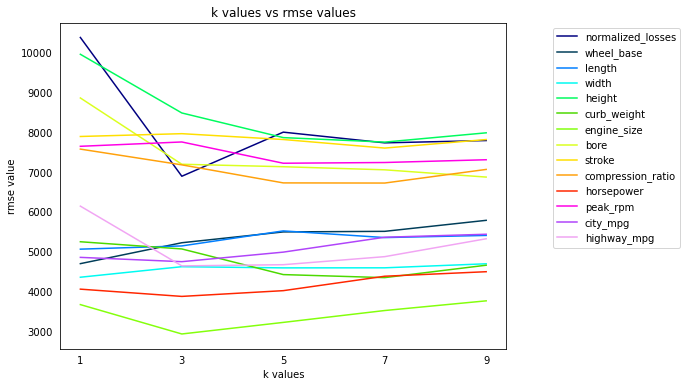

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from cycler import cycler


#color map
cmap = plt.cm.gist_ncar

#colormap cycle
c = cycler('color', cmap(np.linspace(0,1,15)) )

#sets colorcycle
plt.rcParams['axes.prop_cycle'] = c


plt.figure(figsize = (8,6))


#loops through each column name for cars_numerical as a key in rmse_values
for key in rmse_values:
    x = []
    y = []

    for k in [1,3,5,7,9]:
        x.append(k)
        y.append(rmse_values[key][k])
    plt.plot(x,y, label = key)

#moves legend outside of figure
plt.legend(bbox_to_anchor = (1.4,1))

#formats axes and tick params
plt.xticks([1,3,5,7,9])

plt.tick_params(bottom = False, top = False, left = False, right = False)

plt.xlabel('k values')
plt.ylabel('rmse value')
plt.title('k values vs rmse values')

plt.show()

# Multivariate Models
Now that we have done a univariate model for all the different columns we will modify the knn_train_test function to take in a list of columns and return a rmse value for the list of columns. This will be done with the default k value of 5. We will be using the best performing variable from the univariate models, starting with the two best variables and adding one more variable up to 5 variables.

In [20]:
#redefines knn_train_test with a k parameter
def knn_train_test(training_col, target_col, df, k = 5):
    #sets a seed for reproducability
    np.random.seed(1)
    
    #randomizes indexes for the dataframe
    randomized = np.random.permutation(range(0,len(df)))
    
    #midpoint of df rounded up
    midpoint = round((len(df) + 1) / 2)
    
    #splits dataframe into two halves with a training set and test set 
    training_set = df.iloc[randomized[:midpoint]]
    test_set = df.iloc[randomized[midpoint:]]
    
    #instantiates a KNeighborsRegeressor class with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fits training_set to a model
    knn.fit(X = training_set[training_col], y = training_set[target_col])
    
    #predicts target_col values on test_set
    predictions = knn.predict(test_set[training_col])
    
    #calculates rmse
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse



In [21]:
top_five_values = sorted(rmse_dict.values())[:5]
top_five_dict = {}
for key in rmse_dict:
    value = rmse_dict[key]
    if value in top_five_values:
        top_five_dict[key] = value
top_five_dict

{'width': 4593.417310630508,
 'curb_weight': 4424.912852203985,
 'engine_size': 3224.6747825478465,
 'horsepower': 4021.5187559925666,
 'highway_mpg': 4673.141659783063}

In [22]:
best_2 = knn_train_test(['engine_size', 'horsepower'], 'price', cars_numerical)
best_3 = knn_train_test(['engine_size', 'horsepower', 'curb_weight'], 'price', cars_numerical)
best_4 = knn_train_test(['engine_size', 'horsepower', 'curb_weight', 'width'], 'price', cars_numerical)
best_5 = knn_train_test(['engine_size', 'horsepower', 'curb_weight', 'width', 'highway_mpg'], 'price', cars_numerical)
print(best_2, best_3, best_4, best_5)

2949.6709072708436 3437.964685682504 3490.3631757168196 3410.6818843744427


# Hyperparemeter Optimization
Now we will take the best 3 of these 4 models and vary the k value from 1 to 25.

In [23]:
#the top 3 models column names
two_cols = ['engine_size', 'horsepower']
five_cols = ['engine_size', 'horsepower', 'curb_weight', 'width', 'highway_mpg']
three_cols = ['engine_size', 'horsepower', 'curb_weight']


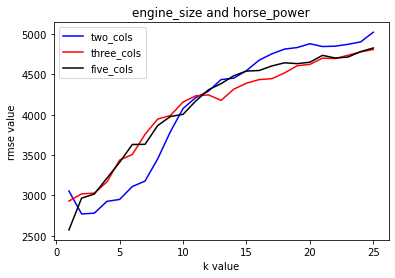

In [28]:
%matplotlib inline
two_cols_rmse = []
three_cols_rmse = []
five_cols_rmse = []
k_values = [i for i in range(1,26)]

for k in k_values:
    two_cols_rmse.append(knn_train_test(two_cols, 'price', cars_numerical, k))
    three_cols_rmse.append(knn_train_test(three_cols, 'price', cars_numerical, k))
    five_cols_rmse.append(knn_train_test(five_cols, 'price', cars_numerical, k))

plt.plot(k_values, two_cols_rmse, c = 'blue', label = 'two_cols')
plt.plot(k_values, three_cols_rmse, c = 'red', label = 'three_cols')
plt.plot(k_values, five_cols_rmse, c = 'black', label = 'five_cols')

plt.legend()
plt.title('engine_size and horse_power')
plt.xlabel('k value')
plt.ylabel('rmse value')

plt.show()

The two column model has a optimal k value of 2 the five column and the three column model both had an optimal k value of 1. I think the reason these k values are all very small is because the cleaned dataset has only 201 rows with 101 used for training and 100 used for testing. With a small number of values to train and test the models all favor very small k values to find the most similar car. Using a different dataset with many more cars could possibly favor larger k values and be more accurate in predicting prices.  